# Einführung Titanic-Datensatz

Das Ziel der heutigen Vorlesung ist den Titanic-Datensatz von kaggle.com zu untersuchen.

Eine Beschreibung des Titanic-Datensatz ist hier zu finden:
https://www.kaggle.com/c/titanic
***
```
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


VARIABLE DESCRIPTIONS:
survived        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```
***


Im Rahmen der Aufgaben werden folgende bereits bekannte Frameworks verwendet:
- numPy:   Numerik-Framework, "Brücke" zu Fortran / C (http://www.numpy.org/)
- pandas:  Datenstrukturen und zugehörige Operationen (http://pandas.pydata.org/)
- pyplot:  prozedurales Interface für Matplotlib          (http://matplotlib.org/users/pyplot_tutorial.html)

Im Folgenden werden die für diese Aufgabe benötigten Imports getätigt, sowie den Datensatz als *Pandas Dataframe* eingelesen:

In [1777]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

%matplotlib inline

DATA_FILE = '../Data/original_titanic.csv'
df = pd.read_csv(DATA_FILE, header=0)

## 1.) Datenanalyse mit Pandas 
Das DataFrame Object aus der panda Bibliothek ist eine mächtige Datenstruktur mit vielen praktischen Funktionen um mit großen Datensätzen umzugehen. Um einen schnellen Einstieg in pandas zu erhalten empfehle ich Ihnen ein Blick in das 10 Minutes to pandas Tutorial zu werfen: http://pandas.pydata.org/pandas-docs/stable/10min.html. Umfangreiche Informationen finden Sie in der pandas Dokumentation (http://pandas.pydata.org/pandas-docs/stable/index.html). Häufig ist auch die ipython Autovervollständigung (TAB) ein gutes Hilfsmittel um entsprechende Methoden das DataFrames zu finden.

Im Folgenden finden Sie einige einfache, selbsterklärende Beispiele für den Umgang mit dem Pandas DataFrame. Führen Sie die Beispiele aus (z.B. in dem Sie bei fokussierter Zelle Shift+ENTER drücken) und schauen Sie sich die Ergebnisse an. 
 

In [1778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Home-Dest    745 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [1779]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486055,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## header


In [1780]:
df.Age[0:5]

0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
Name: Age, dtype: float64

In [1781]:
print(df[['Age','Sex']][0:3])

     Age     Sex
0  29.00  female
1   0.92    male
2   2.00  female


In [1782]:
df.loc[1:10,'Age']

1      0.92
2      2.00
3     30.00
4     25.00
5     48.00
6     63.00
7     39.00
8     53.00
9     71.00
10    47.00
Name: Age, dtype: float64

In [1783]:
x = df[['Age','Sex']][(df.Sex == 'female') & (df.Age > 20)][0:5]
print(x)

     Age     Sex
0   29.0  female
4   25.0  female
6   63.0  female
8   53.0  female
12  24.0  female


In [1784]:
print(type (x))
print(type (x.values))
for i,j in x.values:
    print("age %d, sex %s" % (i,j))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
age 29, sex female
age 25, sex female
age 63, sex female
age 53, sex female
age 24, sex female


In [1785]:
df.Age.groupby(df.Sex).mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [1786]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

Um einen ersten Eindruck von den vorliegenden Daten zu beokmmen sowie die Möglichkeiten des DataFrame Objektes kennen zu lernen untersuchen Sie bitte die folgenden Fragestellungen: 

1.) Wie Umfangreich ist der Titanic Datensatz? Wieviel Merkmale (Spalten) bzw. Objekte (Datenreihen) liegen vor?

In [1787]:
df.info()
# 13 colums
# 1309 entries
# over all 13 * 1309

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Home-Dest    745 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


2.) Wie sehen die ersten zehn Objekte aus? Was fällt Ihnen auf? Verstehen Sie die Bedeutung der Merkmale?


In [1788]:
for key , value in df[0:10].iteritems():
    print(key, value)
df.head(10)
df.describe()
# Unterschiedlich viele Einträge 1309 and some 1046
# unterschiedliche Datentypen



PassengerId 0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64
Survived 0    1
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64
Pclass 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Pclass, dtype: int64
Name 0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
Name: Name, dtype: object
Sex 0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486055,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


3.) Welche Datentypen haben die einzelnen Merkmale?

In [1789]:
"""
0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Home-Dest    745 non-null    object
"""

"""
for x,y in df[0:3].iterrows():
    print(x,y)

for key, value in df[0:3].iteritems():
    print(key, value)
"""
for key , value in df.iteritems():
    print(key, value.dtype)


PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object
Home-Dest object


4.) Welche Merkmale sind quantitativ, welche sind qualitativ?

<b>Quantitative Merkmale</b>:  intervallskalierte metrische Werte, z.B. Körpergewicht, Einkommen. 
Für diese Merkmale können verschiedene mathematische Rechenoperationen durchgeführt werden, wie zum Beispiel die Errechnung eines Durchschnitts <br>

<b>Qualitative Merkmale</b>:  Merkmale lassen sich eindeutig in Kategorien unterscheiden, diese Unterteilung besitzt jedoch keinen mathematischen Wert, z.B. Geschlecht, Religionszugehörigkeit. Für diese Merkmale kann lediglich ein Befragungsergebnis in Anteilen (x von 100%) wiedergegeben werden <br>

<b>Beispiel aus dem Skript</b>:

| Merkmal    | Wert                  | Typ |
|:-----------|:----------------------|-------|
| goldEarned | 15 Stk.               | Quantitativ |
| kills      | 11 Stk.               | Quantitativ |
| championId | 4312234               | Qualitativ |
| lane       | {bootom, middle, top} | Qualitativ |
| role       | {duo, solo, support}  | Qualitativ |

In [1790]:
#int and float -> Quantitative Merkmale
#object -> Qualitative Merkmale

for key , value in df.iteritems():
    if value.dtype == "int64" or value.dtype == "float64":
        print(key, "Quantitative Merkmale")
    if value.dtype == "object":
        print(key, "Qualitatives Merkmale")


PassengerId Quantitative Merkmale
Survived Quantitative Merkmale
Pclass Quantitative Merkmale
Name Qualitatives Merkmale
Sex Qualitatives Merkmale
Age Quantitative Merkmale
SibSp Quantitative Merkmale
Parch Quantitative Merkmale
Ticket Qualitatives Merkmale
Fare Quantitative Merkmale
Cabin Qualitatives Merkmale
Embarked Qualitatives Merkmale
Home-Dest Qualitatives Merkmale


5.) Wieviel Prozent der Passagiere haben das Unglück überlebt?

In [1791]:
summe = 0

s = df["Survived"]
for j in s:
    summe += j
prozent = summe/ len(df["Survived"])
print(prozent)
print("{} Prozent haben überlebt".format(round(prozent*100,2)))


0.3819709702062643
38.2 Prozent haben überlebt


6.) Wieviel Prozent der Überlebenden waren Frauen?

In [1792]:
x = df[['Survived','Sex']][df.Survived == 1]
#print(x)
summe = 0
for i,j in x.values:
    if j == "female":
        summe += 1
        

prozent = summe/ len(x["Survived"])
print(prozent)
print("{} Prozent der Überlebten waren Frauen".format(round(prozent*100,2)))

0.678
67.8 Prozent der Überlebten waren Frauen


7.) Ermitteln Sie jeweils den Mittelwert des Alters für die folgenden Gruppen:

7.a) für alle Passagiere

In [1793]:
df.Age.mean()

29.881137667304014

7.b) getrennt nach Geschlecht

In [1794]:
df.Age.groupby(df.Sex).mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

7.c) für alle Überlebenden

In [1795]:
df.Age.groupby(df.Survived).mean()

Survived
0    30.545363
1    28.918244
Name: Age, dtype: float64

7.d) für alle Frauen welche überlebt haben

In [1796]:
df.Age.groupby(by=[df.Sex , df.Survived]).mean()["female"][1]

29.815376712328767

7.e) für alle Frauen welche überlebt haben, gruppiert nach der Passagier Klasse (Pclass)

In [1797]:
x = df.Age.groupby(by=[df.Sex, df.Survived,df.Pclass]).mean()
x["female"][1]

Pclass
1    37.109375
2    26.711087
3    20.814861
Name: Age, dtype: float64

7.f) für alle Frauen welche nicht überlebt haben, gruppiert nach der Passagier Klasse (Pclass)

In [1798]:
x = df.Age.groupby(by=[df.Sex, df.Survived,df.Pclass]).mean()
x["female"][0]

Pclass
1    35.200000
2    34.090909
3    23.418750
Name: Age, dtype: float64

## 2.) Vorverarbeitung - Imputation (Statistik) - Datenlücken interpolieren
Wie Sie vielleicht schon bei der ersten Aufgabe bemerkt haben, fehlen einzelne Merkmalsausprägungen im vorliegenden Datensatz (NaN-Werte). Dies ist in sofern problematisch da je nach Verfahren, unter Umständen die ganze Datenreihe nicht mehr weiter verarbeitet werden kann. Im vorliegenden Datensatz fehlen Werte in den Merkmalen 'Age' sowie 'Cabin' (siehe df.info()). Da beim Merkmal Cabin nur 204 Einträge vorliegen ist es hier sehr schwer die fehlenden Ausprägungen zu interpolieren. Wir konzentrieren uns daher vorerst auf das Alter, da hier eine größere Datenmenge vorliegt.

Vervollständigen sie die Datenlücken in der Spalte 'Age'. Nutzen Sie dabei Wissen aus den vorliegenden Daten um die einzelnen Datenreihen zuverlässig zu vervollständigen. Es bietet sich an diesen Schritt in eine Funktion auszulagern. Überprüfen Sie Ihr Ergebniss.

<AxesSubplot:>

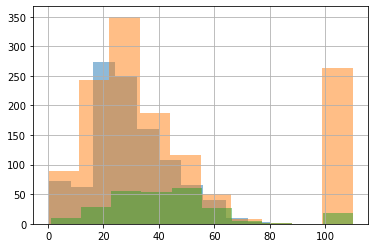

In [1799]:
def prepareData(df1):
    #to set a selection of a data frame please dont use the chained [] operator, but the .loc operator
    #(see http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy for details)
    
    #minimal working example to set all null age values to 42 - probably you can do better :-)
    df1.loc[df.Age.isnull(),'Age'] = 110
    return df1

# Schwierig umzusetzen da wenn Alter nicht vorhanden ist sollte der Komplette eintrage gelöscht werden
# und nicht einfach durch mocup daten ersetzt werden
df.Age.hist(alpha = 0.5)
df1 = prepareData(df)
df1.Age.hist(alpha = 0.5)
#Löschen aller Null
df2 = df.dropna()

df2.Age.hist(alpha = 0.5)

<AxesSubplot:>

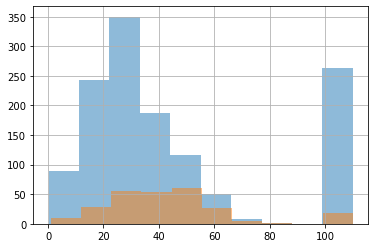

In [1800]:
# Warum ist hier df mit Ages von über 100?
# wurde noch nicht überschrieben und so?
df.Age.hist(alpha = 0.5)
#Löschen aller Null
df2 = df.dropna()
df2.Age.hist(alpha = 0.5)


Erzeugen Sie einen 'Vorher-Nachher'-Plot bei dem Sie die Auswirkungen Ihrer Imputationsmaßnahmen darstellen. Argumentieren und bewerten Sie ihre Maßnahmen.  


## 3.) Visualisierung

Um Zusammenhänge in Daten verstehen zu können, ist es essentiell die Daten zu visualisieren. Nutzen sie für die folgende Aufgabe die python Bibliothek matplotlib (siehe http://matplotlib.org/users/pyplot_tutorial.html). Da uns unsere Daten als padas DataFrame vorliegen, ist es für die einfacheren plots komfortabler die von pandas zur Verfügung gestellten wrapper methoden zu nutzen (siehe http://pandas.pydata.org/pandas-docs/stable/visualization.html).


1.) Visualisieren Sie die absolute Verteilung der Überlebenden anhand eines Barplots. (Tipp: plt.hist(..) oder df.Survived.hist())

(array([ 90., 243., 350., 187., 117.,  50.,   8.,   1.,   0., 263.]),
 array([  0.17 ,  11.153,  22.136,  33.119,  44.102,  55.085,  66.068,
         77.051,  88.034,  99.017, 110.   ]),
 <BarContainer object of 10 artists>)

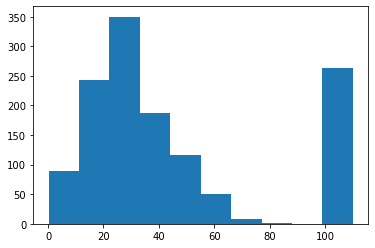

In [1801]:
plt.hist(df.Age)

2.) Visualisieren Sie die Anzahl der Passagiere in der jeweiligen Klasse (Pclass)

<AxesSubplot:ylabel='Frequency'>

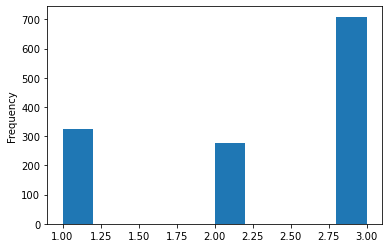

In [1802]:
#plt.hist(df.Pclass, bins = 6)
df.Pclass.plot(kind="hist")

3.) Visualisieren Sie die Verteilung des Alters pro Geschlecht als Histogramm. 

(array([ 48., 144., 232., 123.,  70.,  33.,   7.,   1.,   0., 185.]),
 array([  0.33 ,  11.297,  22.264,  33.231,  44.198,  55.165,  66.132,
         77.099,  88.066,  99.033, 110.   ]),
 <BarContainer object of 10 artists>)

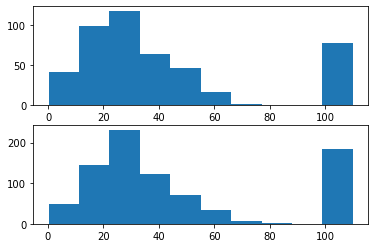

In [1803]:
x1 = df[["Age"]][df.Sex == "female"]
fig, axs = plt.subplots(2)

axs[0].hist(x1["Age"],label= "Age")

x2 = df[["Age"]][df.Sex == "male"]
axs[1].hist(x2["Age"],label= "Age")


4.) Visualisiern Sie die Verteilung des Alters pro Klasse als Wahrscheinlichkeitsdichte. Stellen Sie die Graphen gemeinsam in einem Plot dar (Tipp: plot(kind='density'), möglicherweise müssen sie hier das Python-Paket *scipy* nachinstallieren).

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

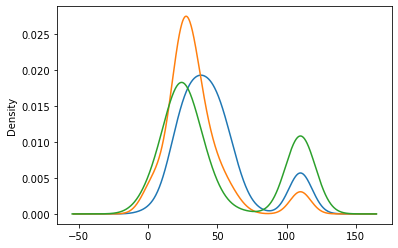

In [1804]:
#x = df[["Age"]]
x = df.Age.groupby(df.Pclass)
plt.figure()
x.plot(kind='density')
#sns.kdeplot(x= x, bw=0.5)


 5) Visualisieren Sie den Zusammenhang zwischen dem Alter und dem Ticketpreis in einem scatter plot. Interpretieren Sie das Resultat.

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

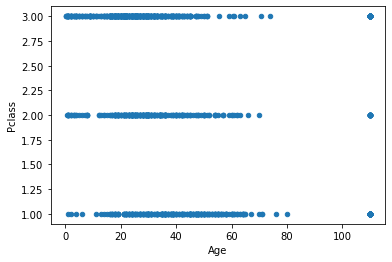

In [1805]:
df.plot.scatter(x="Age",y ="Pclass")

In den bisherigen Plots haben wir einzelne Merkmale unabhängig der Klassenzugehörigkeiten 'Survived' dargestellt. Um die vorliegenden Daten besser zu verstehen und trennungswirksame Merkmale zu identifizieren soll nun untersucht werden wie sich die einzelnen Merkmale in Bezug auf die später vorherzusagende Klasse verhalten.

6) Untersuchen Sie die Korrelation zwischen dem Geschlecht und den Überleben der Katastrophe. Erstellen Sie eine oder mehrere geeignete Visualisierung(en) und interpretieren Sie diese.


<AxesSubplot:xlabel='Age', ylabel='Sex'>

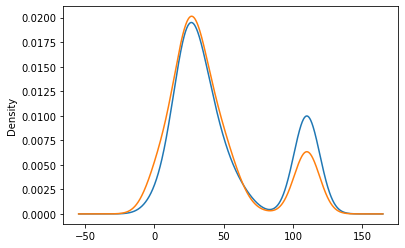

<Figure size 432x288 with 0 Axes>

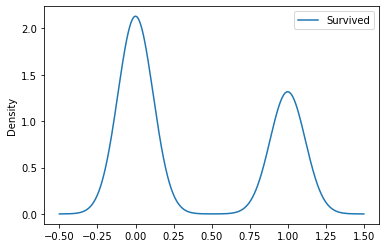

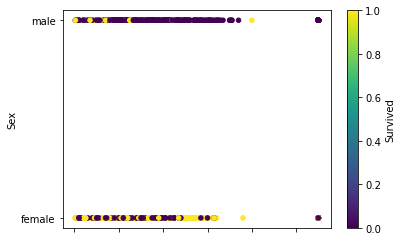

In [1806]:
x = df.Age.groupby(df.Survived)
plt.figure(0)
x.plot(x="Age",y ="Survived",kind="density")


#Der bringt gar nix
plt.figure(1)
df.plot(x="Age",y ="Survived", kind="density")



plt.figure(2)
df.plot.scatter(x="Age", y= "Sex", c = "Survived",cmap="viridis")

      Survived    Age
0            1   29.0
2            0    2.0
4            0   25.0
6            1   63.0
8            1   53.0
...        ...    ...
1286         1   38.0
1290         1   47.0
1300         1   15.0
1304         0   14.5
1305         0  110.0

[466 rows x 2 columns]
      Survived     Age
1            1    0.92
3            0   30.00
5            1   48.00
7            0   39.00
9            0   71.00
...        ...     ...
1302         0  110.00
1303         0  110.00
1306         0   26.50
1307         0   27.00
1308         0   29.00

[843 rows x 2 columns]


C:\Users\Green\AppData\Local\Temp/ipykernel_31964/2411274125.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female[(df.Survived == 1)].hist()


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

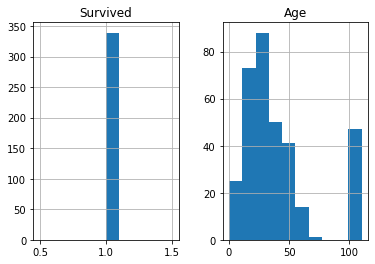

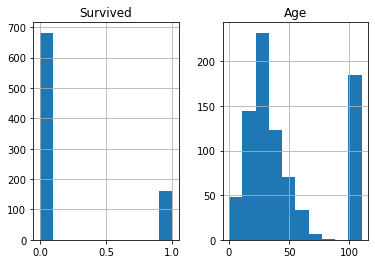

In [1807]:
plt.figure(0)
female = df[["Survived","Age"]][(df.Sex == "female")]
print(female)
female[(df.Survived == 1)].hist()

male = df[["Survived","Age"]][(df.Sex == "male")]
print(male)
male.hist()


Count
male 0    682
1    161
Name: Survived, dtype: int64
female 1    339
0    127
Name: Survived, dtype: int64
[161, 682, 339, 127]


([<matplotlib.patches.Wedge at 0x1898ed7ca60>,
 [Text(1.0188992886173225, 0.41454099876262435, ''),
  Text(-0.8182244221822221, 0.7351930324374469, ''),
  Text(0.16177092389787737, -1.0880395986273788, ''),
  Text(1.0492979733653167, -0.330111743340705, '')])

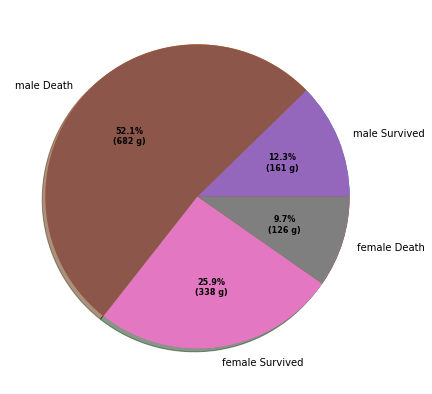

In [1808]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


print("Count")
print("male", male.Survived.value_counts())
print("female",female.Survived.value_counts())
##besseren weg als x und y tauschen?
death_male,alive_male = male.Survived.value_counts()
alive_female ,death_female = female.Survived.value_counts()
data = [alive_male,death_male,alive_female, death_female]
label = ["male Survived","male Death", "female Survived", "female Death"]

print(data)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = label,
                                  shadow = True,
                                  startangle = 0,
                                  textprops = dict(color ="black"))
plt.setp(autotexts,size = 8, weight= "bold")
plt.pie(x=data)


#female.plot(x="Age",y="Survived",kind="hist")


7) Untersuchen Sie die Korrelation zwischen dem Alter und den Überleben der Katastrophe. Erstellen Sie eine geeignete Visualisierung und interpretieren Sie diese.

      Survived    Age
0            1   29.0
2            0    2.0
4            0   25.0
6            1   63.0
8            1   53.0
...        ...    ...
1286         1   38.0
1290         1   47.0
1300         1   15.0
1304         0   14.5
1305         0  110.0

[466 rows x 2 columns]
      Survived     Age
1            1    0.92
3            0   30.00
5            1   48.00
7            0   39.00
9            0   71.00
...        ...     ...
1302         0  110.00
1303         0  110.00
1306         0   26.50
1307         0   27.00
1308         0   29.00

[843 rows x 2 columns]


C:\Users\Green\AppData\Local\Temp/ipykernel_31964/1765703617.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female[(df.Survived == 1)].hist()


<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

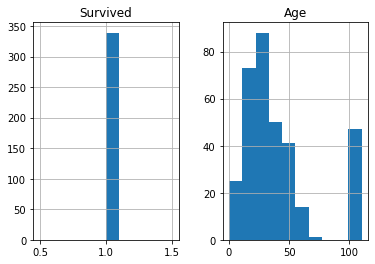

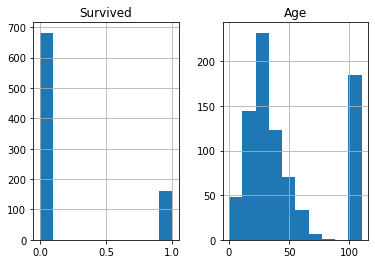

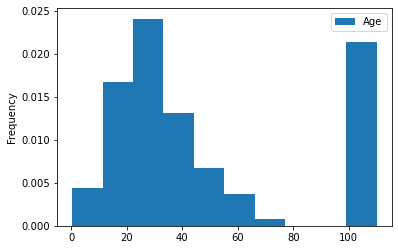

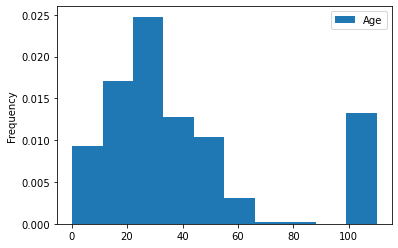

In [1809]:
plt.figure(0)
female = df[["Survived","Age"]][(df.Sex == "female")]
print(female)
female[(df.Survived == 1)].hist()

male = df[["Survived","Age"]][(df.Sex == "male")]
print(male)
male.hist()


death = df[["Age"]][df.Survived ==0]
alive = df[["Age"]][df.Survived ==1]
death.plot.hist(density=True)
alive.plot.hist(density=True)



8) Untersuchen Sie die Korrelation zwischen Passagier Klasse und den Überleben der Katastrophe. Erstellen Sie eine oder mehrere geeignete Visualisierungen und interpretieren Sie diese.



([<matplotlib.patches.Wedge at 0x1898f1ec9d0>,
 [Text(0.975694988935099, 0.5079559907776828, ''),
  Text(0.34142482234543065, 1.0456715979151348, ''),
  Text(-0.28831185252377783, 1.0615442881454864, ''),
  Text(-0.8817805089510535, 0.6576192926260765, ''),
  Text(-1.0836179879617862, -0.1891350209920155, ''),
  Text(0.3288525301048629, -1.0496932949407796, '')])

<Figure size 432x288 with 0 Axes>

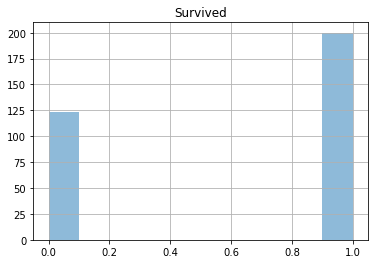

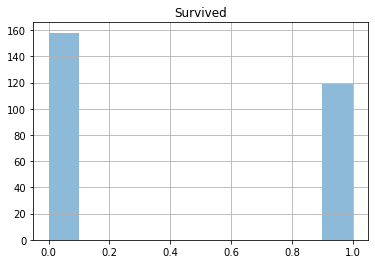

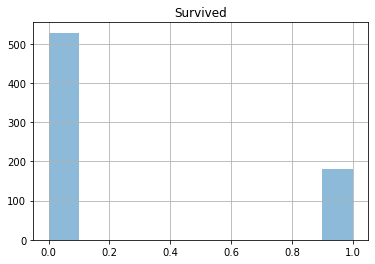

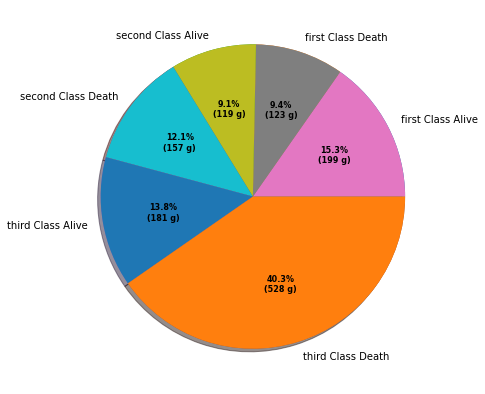

In [1810]:
plt.figure(0)
frist = df[["Survived"]][(df.Pclass == 1)]

frist.hist(alpha= 0.5)

second = df[["Survived"]][(df.Pclass == 2)]
second.hist(alpha= 0.5)
third = df[["Survived"]][(df.Pclass == 3)]
third.hist(alpha= 0.5)


x0, y0 = frist.value_counts("Survived")
y1, x1 = second.value_counts("Survived")
y2, x2 = third.value_counts("Survived")

data = [x0, y0,x1,y1,x2,y2]

labels = ["first Class Alive", "first Class Death","second Class Alive","second Class Death","third Class Alive","third Class Death"]

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = labels,
                                  shadow = True,
                                  startangle = 0,
                                  textprops = dict(color ="black"))
plt.setp(autotexts,size = 8, weight= "bold")
plt.pie(x=data)